- units are missing!
- 

In [2]:
import xarray as xr

In [7]:
xr.open_dataset('impact_geo_curpol_CHN_glacier-area_0.5_present-day-2020_2030_1.nc')['glacier-area']

<xarray.DataArray 'glacier-area' (latitude: 62, longitude: 36)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float64 18.5 19.5 20.5 21.5 ... 76.5 77.5 78.5 79.5
  * longitude  (longitude) float64 73.5 74.5 75.5 76.5 ... 106.5 107.5 108.5
Attributes:
    scenario:   curpol
    geography:  CHN
    time:       annual
    reference:  present-day-2020
    spatial:    area
    model:      ??
    source:     ??
    year:       2030
    crs:        EPSG:4326

In [3]:
ds_curpol = xr.open_dataset('impact_geo_curpol_CHN_glacier-volume_0.5_present-day_2100_1.nc')

In [5]:
ds_curpol['glacier-volume']

<xarray.DataArray 'glacier-volume' (latitude: 62, longitude: 36)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float64 18.5 19.5 20.5 21.5 ... 76.5 77.5 78.5 79.5
  * longitude  (longitude) float64 73.5 74.5 75.5 76.5 ... 106.5 107.5 108.5
Attributes:
    scenario:   curpol
    geography:  CHN
    time:       annual
    reference:  present-day
    spatial:    area
    model:      ??
    source:     ??
    year:       2100
    crs:        EPSG:4326

In [3]:
ds_curpol['glacier-volume'].max()

<xarray.DataArray 'glacier-volume' ()>
array(1.)

In [4]:
ds_curpol['glacier-volume'].min()

<xarray.DataArray 'glacier-volume' ()>
array(0.94287723)

In [5]:
1-(1-ds_curpol['glacier-volume']).sum()

<xarray.DataArray 'glacier-volume' ()>
array(0.61331237)

In [6]:
ds_sp = xr.open_dataset('impact_geo_sp_CHN_glacier-volume_0.5_present-day_2100_1.nc')

In [7]:
1-(1-ds_sp['glacier-volume']).sum()

<xarray.DataArray 'glacier-volume' ()>
array(0.34653303)

In [8]:
ds_sp['glacier-volume'].min()

<xarray.DataArray 'glacier-volume' ()>
array(0.92548608)

In [9]:
ds_sp['glacier-volume'].max()

<xarray.DataArray 'glacier-volume' ()>
array(1.)

In [10]:
(ds_curpol['glacier-volume'] - ds_sp['glacier-volume']).max()

<xarray.DataArray 'glacier-volume' ()>
array(0.01739115)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
import pandas as pd
import numpy as np
import xarray as xr
# gripoint data for CHINA downloaded from dashboard 
ds_curpol = xr.open_dataset('impact_geo_curpol_CHN_glacier-volume_0.5_present-day_2100_1.nc')
ds_sp = xr.open_dataset('impact_geo_sp_CHN_glacier-volume_0.5_present-day_2100_1.nc')
# time line data for CHINA downloaded from dashboard
pd_time_curpol = pd.read_csv('impact-time_CHN_curpol_glacier-volume_0.5_present-day.csv')
pd_time_sp = pd.read_csv('impact-time_CHN_sp_glacier-volume_0.5_present-day.csv')

In [13]:
### Volume loss in 2100 rel. to 2020? volume: 
# from sum over gridpoints
vol_2100_grid_sum_sp = 1-(1-ds_sp['glacier-volume']).sum().values  # sum over remaining volume (1-XX), then reconvert to volume losses
print(f'Sum over gridpoint volume losses in 2100: {vol_2100_grid_sum_sp.round(4)}')
# from timeline
vol_2100_time_sp = pd_time_sp.loc[pd_time_sp.year==2100,'glacier-volume_mean'].values.squeeze()
print(f'Volume loss in 2100 (from timeline data): {vol_2100_time_sp.round(4)}')
np.testing.assert_allclose(vol_2100_grid_sum_sp,vol_2100_time_sp, rtol=0.01 )

Sum over gridpoint volume losses in 2100: 0.3465
Volume loss in 2100 (from timeline data): 0.3439


In [14]:
# difference between SP and CURPOL at year 2100
diff_2100_time = (pd_time_sp.loc[pd_time_sp.year==2100,'glacier-volume_mean'] 
                  - pd_time_curpol.loc[pd_time_curpol.year==2100,'glacier-volume_mean']).values.squeeze()
# difference between SP and CURPOL
diff_2100_grid_sum = (ds_sp['glacier-volume']-ds_curpol['glacier-volume']).sum().values

print(f'Sum over differences of gridpoints in 2100: {diff_2100_grid_sum.round(4)}')
print(f'Differences of country-wide estimates in 2100 (from timeline data): {diff_2100_time.round(4)}')
np.testing.assert_allclose(diff_2100_grid_sum,diff_2100_time, rtol=0.02 )

Sum over differences of gridpoints in 2100: -0.2668
Differences of country-wide estimates in 2100 (from timeline data): -0.2631


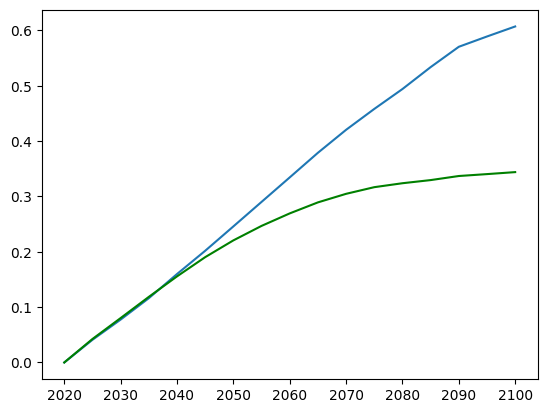

In [29]:
import matplotlib.pyplot as plt
plt.plot(pd_time_curpol.year, pd_time_curpol['glacier-volume_mean'])
plt.plot(pd_time_sp.year, pd_time_sp['glacier-volume_mean'], color='green')


**Check if patrick's postprocessed data submitted to dashboard is equal to the data downloadable from the dashboard (apart from some conversions)**

-> here just for China

In [15]:
### Patrick's OGGM raw data
path='/home/www/pschmitt/provide/aggregate_data/github/provide/countries/resolution_1_deg/aggregated_data/CHN/'
#path = 'patricks_data/resolution_1_deg/'

In [16]:
ds_p_grid = xr.open_dataset(f'{path}CHN_SP_map.nc')
ds_p_grid_sum_sp_2100 = ds_p_grid.sum(dim='lat').sum(dim='lon').sel(time=2100)
np.testing.assert_allclose(ds_p_grid_sum_sp_2100.volume.sel(quantile=0.5), 100-100*vol_2100_grid_sum_sp)

In [17]:
ds_p_time_sp = xr.open_dataset(f'{path}CHN_SP_timeseries.nc')

# check if patrick's postprocessed data is equal to the data downloadable from the dashboard
# yes volume is similar
np.testing.assert_allclose(ds_p_time_sp.volume.sel(quantile=0.5).isel(scenario=0), 100-100*pd_time_sp['glacier-volume_mean'])

In [24]:
ds_p_time_sp.thinning_rate

<xarray.DataArray 'thinning_rate' (quantile: 5, scenario: 1, time: 17)>
array([[[-0.229468, -0.73805 , -0.610454, -0.717401, -0.756274, -0.763147,
         -0.748789, -0.68957 , -0.628656, -0.560998, -0.486315, -0.393828,
         -0.339937, -0.296645, -0.269698, -0.13595 , -0.131057]],

       [[-0.229468, -0.555017, -0.469532, -0.531486, -0.533718, -0.519034,
         -0.482185, -0.429292, -0.384995, -0.341112, -0.305969, -0.264365,
         -0.218042, -0.18628 , -0.155928, -0.07719 , -0.069589]],

       [[-0.229468, -0.468186, -0.412331, -0.453913, -0.448565, -0.433494,
         -0.387512, -0.338535, -0.295804, -0.263563, -0.217122, -0.177873,
         -0.148146, -0.127833, -0.098862, -0.05237 , -0.040523]],

       [[-0.229468, -0.375718, -0.353673, -0.388982, -0.37065 , -0.349721,
         -0.323903, -0.2761  , -0.209335, -0.15276 , -0.124678, -0.109942,
         -0.100179, -0.071955, -0.040894, -0.017779, -0.004465]],

       [[-0.229468, -0.263089, -0.249502, -0.256669, -0.251384, -0.212817,
         -0.182072, -0.151369, -0.108487, -0.079699, -0.041851, -0.03565 ,
         -0.002056,  0.021118,  0.032909,  0.022177,  0.027296]]])
Coordinates:
  * time            (time) float64 2.02e+03 2.025e+03 ... 2.095e+03 2.1e+03
  * scenario        (scenario) object 'SP'
    hydro_year      (time) int64 2020 2025 2030 2035 ... 2085 2090 2095 2100
    hydro_month     (time) int64 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
    calendar_year   (time) int64 2020 2025 2030 2035 ... 2085 2090 2095 2100
    calendar_month  (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  * quantile        (quantile) float64 0.05 0.25 0.5 0.75 0.95
Attributes:
    unit:     meter water equivalent per year (m w.e. yr-1)

In [18]:
pd_time_thinning_sp = pd.read_csv('impact-time_CHN_sp_glacier-thinning_rate_0.5_present-day.csv')
pd_time_thinning_sp_2100_median = pd_time_thinning_sp.loc[pd_time_thinning_sp.year==2100]['glacier-thinning_rate_mean'].values

In [20]:
pd_time_thinning_sp

Unnamed: 0  glacier-thinning_rate_min  glacier-thinning_rate_mean  \
0            0                   1.002295                    1.002295   
1            1                   1.007381                    1.004682   
2            2                   1.006105                    1.004123   
3            3                   1.007174                    1.004539   
4            4                   1.007563                    1.004486   
5            5                   1.007631                    1.004335   
6            6                   1.007488                    1.003875   
7            7                   1.006896                    1.003385   
8            8                   1.006287                    1.002958   
9            9                   1.005610                    1.002636   
10          10                   1.004863                    1.002171   
11          11                   1.003938                    1.001779   
12          12                   1.003399                    1.001481   
13          13                   1.002966                    1.001278   
14          14                   1.002697                    1.000989   
15          15                   1.001359                    1.000524   
16          16                   1.001311                    1.000405   

    glacier-thinning_rate_max  year  
0                    1.002295  2020  
1                    1.002631  2025  
2                    1.002495  2030  
3                    1.002567  2035  
4                    1.002514  2040  
5                    1.002128  2045  
6                    1.001821  2050  
7                    1.001514  2055  
8                    1.001085  2060  
9                    1.000797  2065  
10                   1.000419  2070  
11                   1.000357  2075  
12                   1.000021  2080  
13                   0.999789  2085  
14                   0.999671  2090  
15                   0.999778  2095  
16                   0.999727  2100

In [19]:
pd_time_thinning_sp_2100_median # WHAT DOES THIS REPRESENT???

array([1.00040523])

*does it show the ratio rel. to 2020?*

In [116]:
(ds_p_time_sp.thinning_rate.sel(time=2100).sel(quantile=0.5))/ds_p_time_sp.thinning_rate.sel(time=2020).sel(quantile=0.5)

<xarray.DataArray 'thinning_rate' (scenario: 1)>
array([0.17659575])
Coordinates:
  * scenario        (scenario) object 'SP'
    hydro_month     int64 4
    calendar_month  int64 1
    quantile        float64 0.5

--> NO! 

In [ ]:
*a relative difference?*

In [117]:
(+ds_p_time_sp.thinning_rate.sel(time=2100).sel(quantile=0.5) - ds_p_time_sp.thinning_rate.sel(time=2020).sel(quantile=0.5))/ds_p_time_sp.thinning_rate.sel(time=2020).sel(quantile=0.5)

<xarray.DataArray 'thinning_rate' (scenario: 1)>
array([-0.82340425])
Coordinates:
  * scenario        (scenario) object 'SP'
    hydro_month     int64 4
    calendar_month  int64 1
    quantile        float64 0.5
    time            float64 2.02e+03
    hydro_year      int64 ...
    calendar_year   int64 ...

--> NO! 

**Issue--> different longitudes/latitudes**: *Check for every single gridpoint*

In [68]:
_d = ds_sp.to_dataframe().reset_index().dropna()
_d['lat_lon'] = _d['latitude'].astype(str) + '_'+ _d['longitude'].astype(str)
pd_grid_2100_nonans = _d.set_index('lat_lon')


_p = ds_p_grid.sel(quantile=0.5).sel(time=2100).to_dataframe().reset_index().dropna()
_p['lat_lon'] = _p['lat'].astype(str) + '_'+ _p['lon'].astype(str)
pd_p_grid_2100_nonans = _p.set_index('lat_lon')[['lat','lon','volume']]

#pd_p_grid_2100_nonans.loc[pd_grid_2100_nonans.index]

In [69]:
_d.latitude.max()

48.5

In [70]:
_p.lat.max()

49.5

--> somehow other lon/lat definitions.... 
it does not seem to have an equal shift ???

In [75]:
pd_grid_2100_nonans.sort_values(['latitude', 'longitude'])

latitude  longitude  glacier-volume
lat_lon                                       
18.5_93.5      18.5       93.5        0.999652
18.5_94.5      18.5       94.5        0.998800
19.5_91.5      19.5       91.5        0.999767
19.5_92.5      19.5       92.5        0.997608
19.5_93.5      19.5       93.5        0.998965
...             ...        ...             ...
47.5_86.5      47.5       86.5        0.999977
47.5_87.5      47.5       87.5        0.999999
47.5_92.5      47.5       92.5        0.999998
48.5_86.5      48.5       86.5        0.999975
48.5_87.5      48.5       87.5        0.999999

[257 rows x 3 columns]

In [76]:
pd_p_grid_2100_nonans.sort_values(['lat', 'lon'])

lat   lon    volume
lat_lon                        
27.5_86.5  27.5  86.5  0.079158
27.5_87.5  27.5  87.5  0.459140
27.5_88.5  27.5  88.5  0.235126
27.5_89.5  27.5  89.5  0.008359
27.5_91.5  27.5  91.5  0.008906
...         ...   ...       ...
47.5_90.5  47.5  90.5  0.000010
48.5_87.5  48.5  87.5  0.009298
48.5_88.5  48.5  88.5  0.000125
49.5_86.5  49.5  86.5  0.000000
49.5_87.5  49.5  87.5  0.050690

[257 rows x 3 columns]

In [119]:
#pd_grid_2100_nonans.index:
#    if lat_lon not in pd_p_grid_2100_nonans.index:
# print(lat_lon)

In [123]:
pd_grid_2100_nonans.latitude.unique(), pd_grid_2100_nonans.longitude.unique()

(array([18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5,
        29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5,
        40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5]),
 array([ 93.5,  94.5,  91.5,  92.5,  95.5,  90.5,  96.5,  86.5,  87.5,
         88.5,  89.5,  85.5,  99.5,  97.5, 100.5,  84.5,  98.5,  83.5,
        102.5,  82.5, 104.5, 103.5]))

In [122]:
pd_p_grid_2100_nonans.lat.unique(), pd_p_grid_2100_nonans.lon.unique()

(array([27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5,
        38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 47.5, 48.5, 49.5]),
 array([ 86.5,  87.5,  88.5,  89.5,  91.5,  92.5,  98.5, 100.5,  84.5,
         85.5,  90.5,  93.5,  96.5,  97.5,  99.5,  82.5,  83.5,  94.5,
         95.5, 101.5, 102.5,  79.5,  80.5,  81.5,  78.5, 103.5,  76.5,
         77.5,  74.5,  75.5,  73.5]))

### Unavoidable risk plot

In [129]:
ds_curpol_unavoidable_risk = xr.open_dataset(path+'CHN_CurPol_unavoidable_risk.nc')
np.testing.assert_allclose(ds_curpol_unavoidable_risk.volume.sel(time=2020), 0)

In [135]:
ds_curpol_unavoidable_risk.volume.sel(time=2100)

<xarray.DataArray 'volume' (risk_threshold: 10, scenario: 1)>
array([[1.  ],
       [1.  ],
       [1.  ],
       [0.98],
       [0.86],
       [0.54],
       [0.22],
       [0.05],
       [0.  ],
       [0.  ]])
Coordinates:
    time            float64 2.1e+03
  * scenario        (scenario) object 'CurPol'
  * risk_threshold  (risk_threshold) int64 10 20 30 40 50 60 70 80 90 99
    hydro_year      int64 2100
    hydro_month     int64 4
    calendar_year   int64 2100
    calendar_month  int64 1

In [140]:
# manually checked
np.testing.assert_allclose(ds_curpol_unavoidable_risk.volume.sel(time=2100).sel(risk_threshold=10), 1)
np.testing.assert_allclose(ds_curpol_unavoidable_risk.volume.sel(time=2100).sel(risk_threshold=20), 1)
np.testing.assert_allclose(ds_curpol_unavoidable_risk.volume.sel(time=2100).sel(risk_threshold=30), 1)
np.testing.assert_allclose(ds_curpol_unavoidable_risk.volume.sel(time=2100).sel(risk_threshold=40), 0.98)# 
np.testing.assert_allclose(ds_curpol_unavoidable_risk.volume.sel(time=2100).sel(risk_threshold=50), 0.86)# 
np.testing.assert_allclose(ds_curpol_unavoidable_risk.volume.sel(time=2100).sel(risk_threshold=60), 0.54)# ??
np.testing.assert_allclose(ds_curpol_unavoidable_risk.volume.sel(time=2100).sel(risk_threshold=70), 0.22)# ??
np.testing.assert_allclose(ds_curpol_unavoidable_risk.volume.sel(time=2100).sel(risk_threshold=80), 0.05)# ??
#np.testing.assert_allclose(ds_curpol_unavoidable_risk.volume.sel(time=2100).sel(risk_threshold=90), 0.05)# ?? 90 value is missin!!!
np.testing.assert_allclose(ds_curpol_unavoidable_risk.volume.sel(time=2100).sel(risk_threshold=99), 0)

In [ ]:
'/home/www/pschmitt/provide/aggregate_data/github/provide/countries/resolution_1_deg/aggregated_data/CHN/CHN_CurPol_unavoidable_risk.nc'